Práctica 4: Resolviendo el Problema XOR utilizando un Perceptrón Multicapa
Redes Neuronales y Aprendizaje Profundo
Rodrigo F. Román Godínez
Flores Lara Alberto
5BV1

Objetivo:
En esta práctica, implementarás una red neuronal de función de base radial (RBF) para
resolver problemas de clasificación. El objetivo es entender el funcionamiento de las
neuronas RBF y aplicar dos métodos: uno con parámetros manuales y otro con
entrenamiento utilizando descenso de gradiente.
Parte 1: Implementación Manual de una Red RBF
Instrucciones:
1. Define la estructura de una red RBF:
* Programa una red RBF con la capacidad de asignar manualmente:
* Centroides de las funciones gausianas.
* Radio (sigma) de las funciones gausianas.
* Pesos y bias de la capa perceptrón.
2. Grafica la frontera de decisión:
* Usando los parámetros definidos manualmente, grafica la frontera de
decisión de tu red para visualizar cómo clasifica los datos.

Tips:
* Recuerda que la salida de una neurona RBF se obtiene a través de una función
gaussiana.
* La frontera de decisión se puede graficar creando una malla de puntos y calculando
la salida de la red para cada punto.

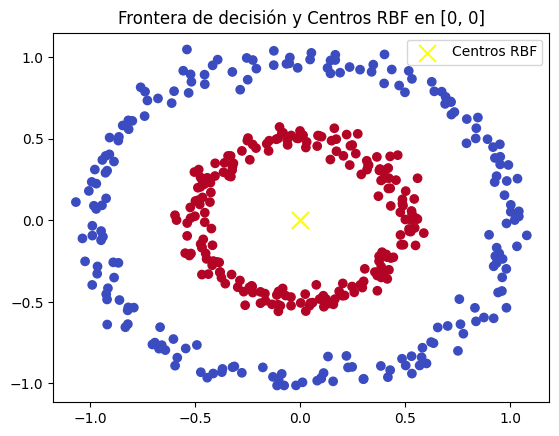

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Función para generar datos en dos anillos concéntricos
def generate_circular_data(radius1, radius2, points_per_ring, noise):
    angles = np.linspace(0, 2 * np.pi, points_per_ring)
    
    #Anillo 1
    x1 = radius1 * np.cos(angles) + noise * np.random.randn(points_per_ring)
    y1 = radius1 * np.sin(angles) + noise * np.random.randn(points_per_ring)
    data1 = np.vstack((x1, y1)).T
    labels1 = np.zeros(points_per_ring)  # Clase 0

    #Anillo 2
    x2 = radius2 * np.cos(angles) + noise * np.random.randn(points_per_ring)
    y2 = radius2 * np.sin(angles) + noise * np.random.randn(points_per_ring)
    data2 = np.vstack((x2, y2)).T
    labels2 = np.ones(points_per_ring)  # Clase 1

    data = np.vstack((data1, data2))
    labels = np.hstack((labels1, labels2))
    
    return data, labels

# Generamos los datos
data, labels = generate_circular_data(radius1=0.5, radius2=1, points_per_ring=200, noise=0.05)

# Definición manual de los centros RBF
manual_centers = np.array([
    [0.0, 0.0],  # Centro en (0, 0) para el anillo interno
    [0.0, 0.0],  # Centro en (0, 0) para el anillo externo
])

# Radio (sigma) manual para los dos anillos
sigma = 0.5

# Función radial gaussiana
def rbf_function(x, c, sigma):
    return np.exp(-np.linalg.norm(x - c)**2 / (2 * sigma**2))

#Perceptrón
# Pesos y bias manuales
manual_weights = np.array([1, 1])
manual_bias = -0.2

# Predicción usando la red RBF manual
def predict_rbf(X, centers, sigma, weights, bias):
    rbf_outputs = np.array([[rbf_function(x, c, sigma) for c in centers] for x in X])
    output = rbf_outputs.dot(weights) + bias
    return np.round(output).astype(int)  # Clasificación binaria

# Predicciones
predictions = predict_rbf(data, manual_centers, sigma, manual_weights, manual_bias)

# Visualización de la frontera de decisión
def plot_decision_boundary(data, predictions, centers):
    plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='coolwarm')
    plt.scatter(centers[:, 0], centers[:, 1], s=150, c='yellow', marker='x', label="Centros RBF")
    plt.title("Frontera de decisión y Centros RBF en [0, 0]")
    plt.legend()
    plt.show()

# Visualización de la frontera de decisión
plot_decision_boundary(data, predictions, manual_centers)


Parte 2: Entrenamiento Automático con Descenso de Gradiente
Instrucciones:
1. Modifica la red RBF:
* En lugar de definir manualmente los parámetros de las neuronas RBF, genera
los centroides y radios automáticamente según la cantidad de neuronas
que determines.
2. Entrenamiento del perceptrón:
* Implementa un perceptrón que se entrene utilizando descenso de
gradiente. Ajusta los pesos y bias en función de los errores que cometa la
red.
* Utiliza una función de pérdida, como el error cuadrático medio (MSE), para
calcular los errores en cada iteración.
* Realiza varias épocas de entrenamiento para mejorar el rendimiento del
modelo.
3. Grafica los resultados:
* Al igual que en la Parte 1, grafica la frontera de decisión después de entrenar
el perceptrón.
Tips:
* Para el descenso de gradiente, asegúrate de actualizar los pesos y el bias de
acuerdo con la derivada de la función de pérdida.
* Usa una tasa de aprendizaje pequeña para que el entrenamiento sea estable

c:\Users\albsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Epoch 1/100, Loss: 0.5
Epoch 2/100, Loss: 0.5
Epoch 3/100, Loss: 0.5
Epoch 4/100, Loss: 0.5
Epoch 5/100, Loss: 0.5
Epoch 6/100, Loss: 0.5
Epoch 7/100, Loss: 0.5
Epoch 8/100, Loss: 0.5
Epoch 9/100, Loss: 0.5
Epoch 10/100, Loss: 0.5
Epoch 11/100, Loss: 0.4975
Epoch 12/100, Loss: 0.4725
Epoch 13/100, Loss: 0.4025
Epoch 14/100, Loss: 0.34
Epoch 15/100, Loss: 0.2625
Epoch 16/100, Loss: 0.1925
Epoch 17/100, Loss: 0.155
Epoch 18/100, Loss: 0.105
Epoch 19/100, Loss: 0.075
Epoch 20/100, Loss: 0.0475
Epoch 21/100, Loss: 0.035
Epoch 22/100, Loss: 0.03
Epoch 23/100, Loss: 0.03
Epoch 24/100, Loss: 0.0225
Epoch 25/100, Loss: 0.0175
Epoch 26/100, Loss: 0.015
Epoch 27/100, Loss: 0.015
Epoch 28/100, Loss: 0.015
Epoch 29/100, Loss: 0.0125
Epoch 30/100, Loss: 0.01
Epoch 31/100, Loss: 0.0075
Epoch 32/100, Loss: 0.005
Epoch 33/100, Loss: 0.005
Epoch 34/100, Loss: 0.0025
Epoch 35/100, Loss: 0.0025
Epoch 36/100, Loss: 0.0
Epoch 37/100, Loss: 0.0
Epoch 38/100, Loss: 0.0
Epoch 39/100, Loss: 0.0
Epoch 40/100, L

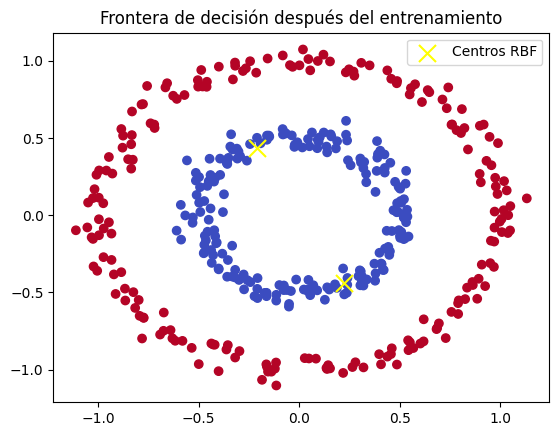

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Función para generar datos en dos anillos concéntricos (mantenemos la misma que en la parte 1)
def generate_circular_data(radius1, radius2, points_per_ring, noise):
    angles = np.linspace(0, 2 * np.pi, points_per_ring)
    
    # Anillo 1
    x1 = radius1 * np.cos(angles) + noise * np.random.randn(points_per_ring)
    y1 = radius1 * np.sin(angles) + noise * np.random.randn(points_per_ring)
    data1 = np.vstack((x1, y1)).T
    labels1 = np.zeros(points_per_ring)  # Clase 0

    # Anillo 2
    x2 = radius2 * np.cos(angles) + noise * np.random.randn(points_per_ring)
    y2 = radius2 * np.sin(angles) + noise * np.random.randn(points_per_ring)
    data2 = np.vstack((x2, y2)).T
    labels2 = np.ones(points_per_ring)  # Clase 1

    data = np.vstack((data1, data2))
    labels = np.hstack((labels1, labels2))
    
    return data, labels

# Función radial gaussiana
def rbf_function(x, c, sigma):
    return np.exp(-np.linalg.norm(x - c)**2 / (2 * sigma**2))

# Función de pérdida (Error cuadrático medio)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Predicción usando la red RBF
def predict_rbf(X, centers, sigma, weights, bias):
    rbf_outputs = np.array([[rbf_function(x, c, sigma) for c in centers] for x in X])
    output = rbf_outputs.dot(weights) + bias
    return np.round(output).astype(int)  # Clasificación binaria

# Entrenamiento del perceptrón usando descenso de gradiente
def train_perceptron(X, y, centers, sigma, learning_rate=0.01, epochs=100):
    num_samples, num_features = X.shape
    num_centers = centers.shape[0]
    
    # Inicializamos los pesos y bias de forma aleatoria
    weights = np.random.randn(num_centers)
    bias = np.random.randn()
    
    # Para cada época
    for epoch in range(epochs):
        for i in range(num_samples):
            # Calculamos la salida del RBF
            rbf_outputs = np.array([rbf_function(X[i], c, sigma) for c in centers])
            output = rbf_outputs.dot(weights) + bias
            
            # Calculo del error
            error = y[i] - output
            
            # Actualizamos los pesos y el bias (descenso de gradiente)
            weights += learning_rate * error * rbf_outputs
            bias += learning_rate * error
            
        # Calculamos el MSE al final de cada época
        predictions = predict_rbf(X, centers, sigma, weights, bias)
        loss = mse_loss(y, predictions)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss}")
    
    return weights, bias

#Generamos los datos
data, labels = generate_circular_data(radius1=0.5, radius2=1, points_per_ring=200, noise=0.05)

# Usamos K-Means para encontrar los centros RBF automáticamente
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
centers = kmeans.cluster_centers_

# Calculamos el radio (sigma) como la distancia promedio entre los puntos y los centros
dists = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
sigma = np.mean(dists)

#Entrenamos el perceptrón con descenso de gradiente
weights, bias = train_perceptron(data, labels, centers, sigma, learning_rate=0.01, epochs=100)

# Realizamos las predicciones finales
predictions = predict_rbf(data, centers, sigma, weights, bias)

#Función para la isualización de la frontera de decisión
def plot_decision_boundary(data, predictions, centers):
    plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='coolwarm')
    plt.scatter(centers[:, 0], centers[:, 1], s=150, c='yellow', marker='x', label="Centros RBF")
    plt.title("Frontera de decisión después del entrenamiento")
    plt.legend()
    plt.show()

# Visualización de la frontera de decisión
plot_decision_boundary(data, predictions, centers)
